In [25]:
import pandas as pd

data = pd.read_csv('../data/clean_weather.csv',index_col=0)
data = data.ffill()
data.head(5)

,tmax,tmin,rain,tmax_tomorrow
1970-01-01,60.0,35.0,0.0,52.0
1970-01-02,52.0,39.0,0.0,52.0
1970-01-03,52.0,35.0,0.0,53.0
1970-01-04,53.0,36.0,0.0,52.0
1970-01-05,52.0,35.0,0.0,50.0


In [26]:
data.shape

(13509, 4)

<Axes: xlabel='tmax', ylabel='tmax_tomorrow'>

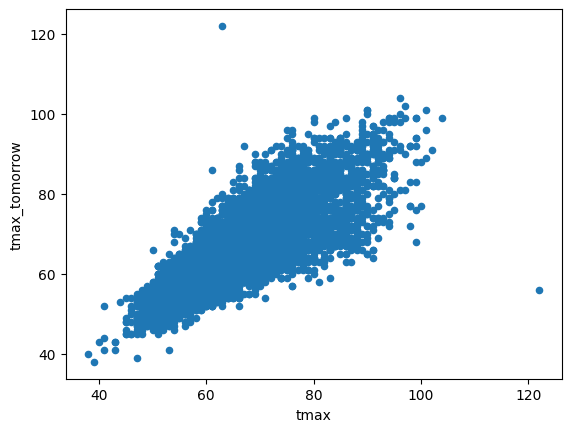

In [27]:
data.plot.scatter("tmax","tmax_tomorrow")

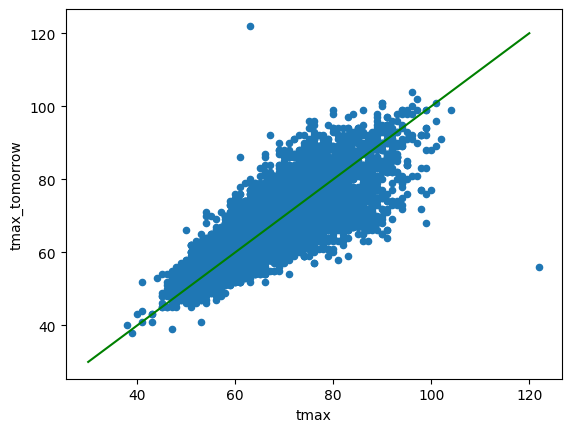

In [28]:
import matplotlib.pyplot as plt
data.plot.scatter("tmax","tmax_tomorrow")
plt.plot([30,120],[30,120],'green')

$\hat{y} = w_{1} * x_{1} + b$

$\hat{y} = w_{1} * x_{1} + w_{2} * x_{2} + b$ 

In [29]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(data[["tmax"]],data["tmax_tomorrow"])


LinearRegression()

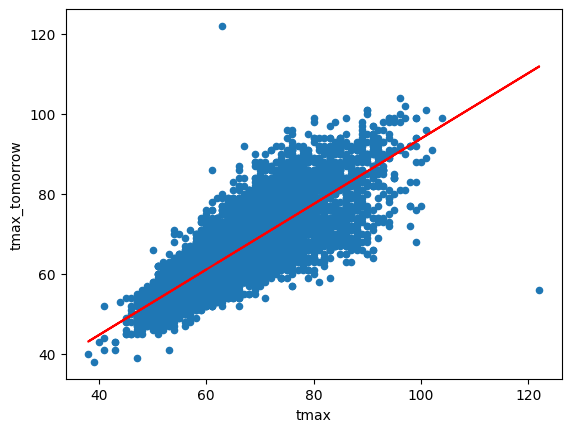

In [30]:
data.plot.scatter("tmax","tmax_tomorrow")
plt.plot(data["tmax"],lr.predict(data[["tmax"]]),"red")

In [31]:
print(f"Weight: {lr.coef_[0]:.2f}")
print(f"Bias: {lr.intercept_:.2f}")

Weight: 0.82
Bias: 11.99


In [32]:
### 预测明天的tmax
.82 * 80 + 11.99

77.58999999999999

#### 均方误差损失函数
$MSE= (\hat{y} -y ) ^2$

In [33]:
### 77.58 是预测值，81是真实值 ，根据以上公式，可以计算出损失
loss1= (77.58 - 81) ** 2
loss2 =(80.5 -81) **2
print(loss1)
print(loss2)


11.696400000000011
0.25


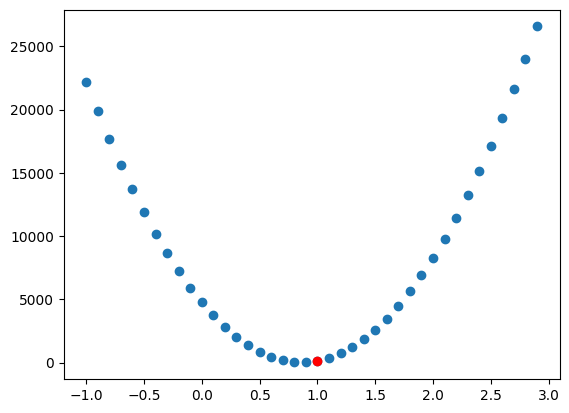

In [34]:
import numpy as np
# 损失函数
loss_fun= lambda w,y :((w*80 + 11.99) -y) **2

## 真实值
y= 81

# 权重值
weights = np.arange(-1,3,.1)

## 使用计算不同权重 相对于真实值 y的损失
losses = loss_fun(weights,y)

plt.scatter(weights,losses)
# 把权重为1的点 标记为红色
plt.plot(1,loss_fun(1,y),'ro')

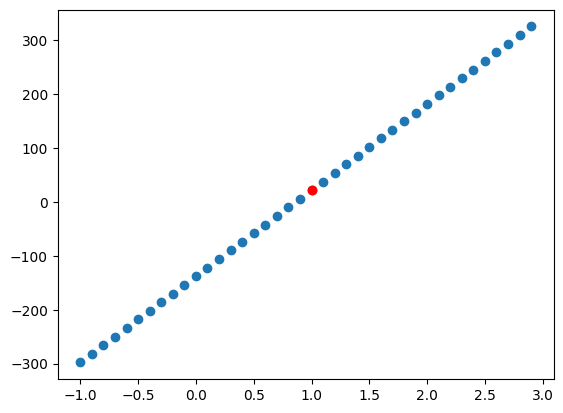

In [35]:

# 损失函数的导数/梯度
grad_fun = lambda w, y: 2 * ((w * 80 + 11.99) - y)


## 计算每个权重相对于 真实值y的梯度

grads = grad_fun(weights,y)
plt.scatter(weights,grads)
plt.plot(1,grad_fun(1,y),'ro')


![Alt text](image-3.png)


![Alt text](image-4.png)

In [36]:
## 对b求偏导数的值
2 * (((80*1) +11.99)-81)

21.97999999999999

##### 我们想知道常数b 对预测值的影响有多大，在这个例子中，b只是加到最后,所以我们对b做的更改会直接影响输出,把b设置为5，那么我们的预测结果会增加5。我们要做的是b对损失函数求偏导
- 我们可以看到 对b求偏导 和对y 求偏导的结果是一样的,也就是说我们可以用类似的
方式来调整b 以减少误差。

- 对b求L的偏导
$\frac{\partial L} {\partial b} = \partial L$

- 对w求偏导
$\frac{\partial L}{\partial w}=\frac{\partial L}{\partial (x*w)}\frac{\partial (x*w)}{\partial w}$



In [37]:
## 权重相对于损失函数导数 2x((wx +b)- y) 如下图所示
## x = 80 w=1  y= 81 b=11.99
dw = 2 * (((80*1) +11.99)-81) * 80
dw



1758.3999999999992

![Alt text](image-6.png)

In [38]:
### 更新权重
### 权重 = 权重 - 权重梯度 * 学习率


![Alt text](image-7.png)

权重w的 1758.3999999999992


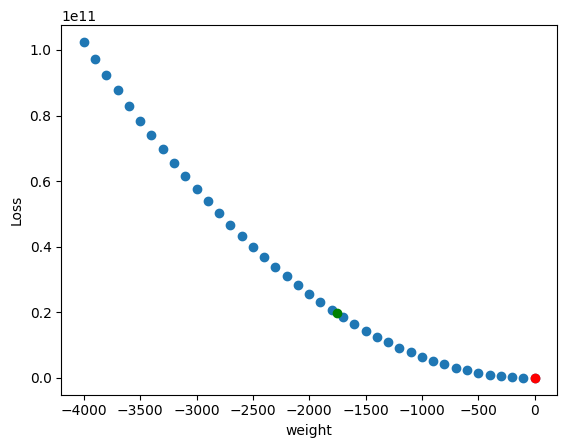

In [39]:
# 定义一组 -4000 ，100的100个权重 ,对于81和 和80 之间 我们尝试不同的权重
## 看其损失值
ws = np.arange(-4000,100,100)
# 对面每个权重求损失
losses = loss_fun(ws,y)

plt.scatter(ws,losses)
plt.xlabel("weight")
plt.ylabel("Loss")
## 标记权重为1时的点
plt.plot(1,loss_fun(1,y),'ro')

## 更新梯度
new_weight = 1 - grad_fun(1,y) * 80 
## 标记新梯度的损失点
plt.plot(new_weight,loss_fun(new_weight,y),'go')

## 我们可以看到 权重1到0.1之间的梯度很大，1758
dw =grad_fun(1,y)
print("权重w的",dw*80)



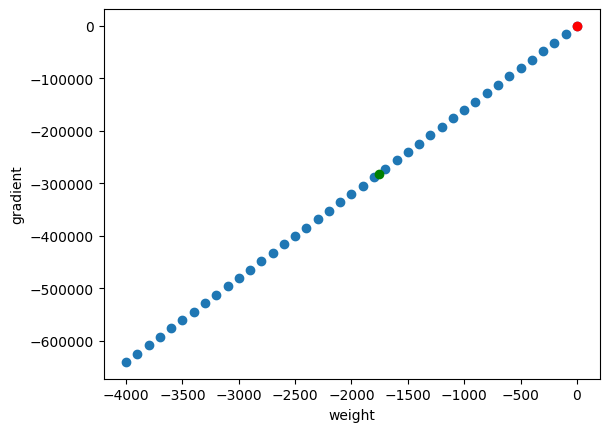

In [40]:
## 梯度随权重的变化

grads = grad_fun(ws,y)

plt.scatter(ws,grads)
plt.plot(1,grad_fun(1,y),'ro')
plt.ylabel("gradient")
plt.xlabel("weight")
plt.plot(new_weight,grad_fun(new_weight,y),'go')


### 增加学习率
新权重 =  老权重 - 梯度 * 学习率


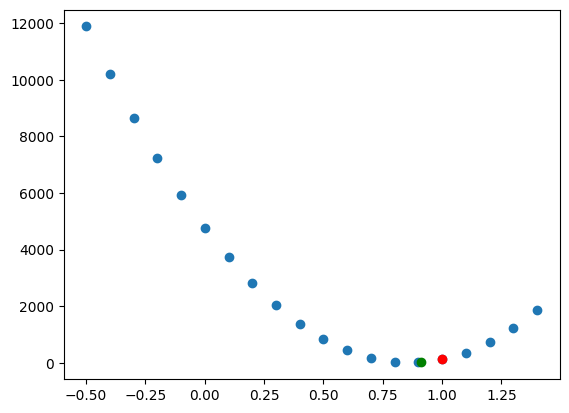

In [41]:
ws = np.arange(-.5,1.5,.1)

losses = loss_fun(ws,y)

plt.scatter(ws,losses)

plt.plot(1,loss_fun(1,y),'ro')

lr= 5e-5
new_weight = 1- lr * grad_fun(1,y) * 80
plt.plot(new_weight,loss_fun(new_weight,y),'go')

## 批量梯度下降
- 上面我们只是对单个样本数据进行了梯度下降，但是我们有13万行数据，所以我们要对所有
数据进行梯度下降，然后后求出平均误差。然后下降梯度。
在实践中，我们并不是对所有样本数据的损失求平均，而是分组求平均，这个分组 我们也成为批次。

In [42]:

PREDICTORS =["tmax","tmin",'rain']
TARGET = "tmax_tomorrow"
np.random.seed(0)

## 将数组分成3部分 7 : 1.5 : 1.5
##split_data = np.split(data,[int(.7*len(data)),int(.85*len(data))])

##(train_x,train_y),(valid_x,valid_y),(test_x,test_y)  = [ [d[PREDICTORS].to_numpy(),d[TARGET].to_numpy()] for d in split_data] 
split_data = np.split(data, [int(.7 * len(data)), int(.85 * len(data))])
(train_x, train_y), (valid_x, valid_y), (test_x, test_y) = [[d[PREDICTORS].to_numpy(), d[[TARGET]].to_numpy()] for d in
                                                            split_data]


/Users/robinyang/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [43]:
import math

def init_params(predictors):
    np.random.seed(0)
    weights = np.random.rand(predictors,1)
    biases = np.ones((1,1))
    return [weights,biases]

init_params(3)

[array([[0.5488135 ],
        [0.71518937],
        [0.60276338]]),
 array([[1.]])]

In [44]:
# 前向传播
def forward(params,x):
    weights,biases = params
    prediction = x @ weights  + biases
    return prediction

def mse(actual,predicted):
    return np.mean((actual - predicted) ** 2)

# w1 * tmax + w2 * tmin + w3* rain + b 

def backward(params,x,lr,grad):

    # x1 * grad , x2 * grad , x3 * grad
    # 因为我们 相对于w求偏导 的值等于 损失函数对y或者b求偏导 乘以 x 
    # 这里对每个样本 除以 总样本数，时为了 让梯度更新不要太大 
    w_grad = (x.T / x.shape[0]) @ grad

    # axis = 0 ，是说我们对所有训练数据进行平均
    b_grad = np.mean(grad,axis=0)

    params[0] -= w_grad *lr
    params[1] -= b_grad * lr

    return params

def mse_grad(actual,predicted):
    return predicted - actual




In [45]:
lr =  1e-4
epoch = 100
params = init_params(train_x.shape[1])

for i in range(epoch):
    
    predicitons = forward(params,train_x)    
    grad = mse_grad(train_y,predicitons)
    params = backward(params,train_x,lr,grad)

    if i % 10 == 0:
        predicitons = forward(params,valid_x)
        valid_loss =mse(valid_y,predicitons)
    

In [46]:
x = np.array([1,2,3])
print(x.shape)
print(x.T/x.shape[0])
print(x.T.shape)


(3,)
[0.33333333 0.66666667 1.        ]
(3,)
